<a href="https://colab.research.google.com/github/nina1603/InternshipTestTask/blob/master/version0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

from glob import glob

%matplotlib inline

In [0]:
import matplotlib.pyplot as plt


def show_img_with_mask(img, mask, figsize=(14, 8)):
    """Shows image and mask.

    Parameters
    ----------
    img : np.ndarray
        Image.
    mask : np.ndarray
        Mask.
    figsize : tuple of 2 int, optional (default=(14, 8))
        Figure size.

    """
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    ax1.imshow(img)
    ax2.imshow(mask)
    ax1.axis("off")
    ax2.axis("off")
    plt.show()

In [0]:
import numpy as np


EPS = 1e-10


def dice(true, pred):
    """Dice score.

    Parameters
    ----------
    true : np.ndarray, 2d
         Ground truth mask that consists of 2 unique values: 0 - denotes background,
         1 - denotes object.
    pred : np.ndarray, 2d
         Predicted mask that consists of 2 unique values: 0 - denotes background,
         1 - denotes object.

    Returns
    -------
    float from 0 to 1
        Dice score. The greater the value of dice score the better.

    Notes
    -----
    Masks should contains only 2 unique values, one of them must be 0, another value, that denotes
    object, could be different from 1 (for example 255).

    """
    true = true.astype(bool)
    pred = pred.astype(bool)

    intersection = (true & pred).sum()
    im_sum = true.sum() + pred.sum()

    return 2.0 * intersection / (im_sum + EPS)


def get_dice(true, pred):
    """Mean dice score.

    Parameters
    ----------
    true : list[np.ndarray] or np.ndarray
         List of ground truth masks or one mask that consists of 2 unique values:
         0 - denotes background, 1 - denotes object.
    pred : list[np.ndarray] or np.ndarray
         List of predicted masks or one mask that consists of 2 unique values:
         0 - denotes background, 1 - denotes object.

    Returns
    -------
    float from 0 to 1
        Dice score or mean dice score in case then lists of masks are passed.
        The greater the value of dice score the better.

    Notes
    -----
    Masks should contains only 2 unique values, one of them must be 0, another value, that denotes
    object, could be different from 1 (for example 255).
    
    """
    print(true
    assert type(true) == type(pred), "Types of true and pred should be the same."
    if isinstance(true, list):
        return np.mean([dice(t, p) for t, p in zip(true, pred)])
    elif isinstance(true, np.ndarray):
        return dice(true, pred)
    else:
        raise TypeError("Wrong type.")

In [0]:
import os
import numpy as np

from glob import glob
from PIL import Image
from datetime import datetime


def generate_html(path_to_data):
    """Generates content of html file and saves it.

    Parameters
    ----------
    path_to_data : str
        Path to data with original images, predicted masks, and cropped according masks images.

    Returns
    -------
    str
        Content of html file.

    """
    html = "\n".join(["<!doctype html>", "<html>", "<head>",
                      "<meta http-equiv='Content-Type' content='text/html; charset=utf-8'>",
                      "<title>Визуализация результатов</title>", "</head>", "<body>",
                      "<table cellspacing='0' cellpadding='5'>"]) + "\n"
    paths_to_imgs = sorted(
        ["/".join(path.split("/")[-2:]) for path in glob(f"{path_to_data}/*_img.jpg")])
    paths_to_masks = sorted(
        ["/".join(path.split("/")[-2:]) for path in glob(f"{path_to_data}/*_pred_mask.png")])
    paths_to_crops = sorted(
        ["/".join(path.split("/")[-2:]) for path in glob(f"{path_to_data}/*_crop.png")])
    for ind, (path_to_img, path_to_mask, path_to_crop) in enumerate(zip(paths_to_imgs,
                                                                        paths_to_masks,
                                                                        paths_to_crops)):
        if not ind % 2:
            html += "<tr>\n"
        html += f"<td width='240' valign='top'><img src='{path_to_img}'"
        html += "alt='Something went wrong.'"
        html += f"height='320' title='Original image:\n{path_to_img}'></td>\n"
        html += f"<td width='240' valign='top'><img src='{path_to_mask}'"
        html += "alt='Something went wrong.'"
        html += "height='320' title='Predicted mask'></td>\n"
        html += f"<td width='240' valign='top'><img src='{path_to_crop}'"
        html += "alt='Something went wrong.'"
        html += "height='320' title='Cropped img according\npredicted mask'></td>\n"
        if not ind % 2:
            html += "<td width='100'></td>\n"
        else:
            html += "</tr>\n"
    date = datetime.today().strftime("%Y-%m-%d-%H.%M.%S")
    html += f"</table>\n<i>The page was generated at {date}</i></body>\n</html>"
    filename = os.path.basename(path_to_data) + ".html"
    path_to_save = os.path.dirname(path_to_data)
    with open(f"{path_to_save}/{filename}", "w") as f:
        f.write(html)

    return html


def get_html(paths_to_imgs, pred_masks, path_to_save="results/test"):
    """Generates html file and saves it.

    Parameters
    ----------
    paths_to_imgs : list[str]
        List of paths to original images.
    pred_masks : list[np.ndarray]
        Predicted masks.
    path_to_save : str
        Path to save source images to put them in html file. Html name is the same as name of the
        last folder on `path_to_save` and is saved on upper level.

    Returns
    -------
    str
        Content of html file.

    """
    paths_to_imgs = np.array(paths_to_imgs)
    pred_masks = np.array(pred_masks)

    if not os.path.exists(path_to_save):
        os.makedirs(path_to_save)

    order = np.argsort(paths_to_imgs)
    paths_to_imgs = paths_to_imgs[order]
    pred_masks = pred_masks[order]

    for path_to_img, pred_mask in zip(paths_to_imgs, pred_masks):
        img_id = path_to_img.split("/")[-1].split(".")[0]
        img = np.array(Image.open(path_to_img))
        Image.fromarray(img).save(f"{path_to_save}/{img_id}_img.jpg")
        Image.fromarray(pred_mask).save(f"{path_to_save}/{img_id}_pred_mask.png")
        crop_img = img.copy()
        crop_img[pred_mask == 0] = 0
        Image.fromarray(crop_img).save(f"{path_to_save}/{img_id}_crop.png")

    html = generate_html(path_to_save)

    return html

In [0]:
import numpy as np


def encode_rle(mask):
    """Returns encoded mask (run length) as a string.

    Parameters
    ----------
    mask : np.ndarray, 2d
        Mask that consists of 2 unique values: 0 - denotes background, 1 - denotes object.

    Returns
    -------
    str
        Encoded mask.

    Notes
    -----
    Mask should contains only 2 unique values, one of them must be 0, another value, that denotes
    object, could be different from 1 (for example 255).

    """
    pixels = mask.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]

    return ' '.join(str(x) for x in runs)


def decode_rle(rle_mask, shape=(320, 240)):
    """Decodes mask from rle string.

    Parameters
    ----------
    rle_mask : str
        Run length as string formatted.
    shape : tuple of 2 int, optional (default=(320, 240))
        Shape of the decoded image.

    Returns
    -------
    np.ndarray, 2d
        Mask that contains only 2 unique values: 0 - denotes background, 1 - denotes object.
    
    """
    s = rle_mask.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for low, high in zip(starts, ends):
        img[low:high] = 1

    return img.reshape(shape)

In [0]:
from google.colab import drive
drive.mount('/content/drive/')
!ls 'drive/My Drive'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
 25xZsvsbp5I.jpg
'8"Ж" физика.gsheet'
 annotation.gdoc
 Annotation.gdoc
 Classroom
'Colab Notebooks'
'coords (1).csv'
 coords.csv
 coords.gsheet
 CV.gdoc
 gt_kontra_2018.xls
 IMG_20170228_184319.jpg
 Influenza.gsheet
 JUNO.gslides
'marine modeling.gslides'
 Photo.rar
'Project maptaxonomy.gsheet'
'Skoltech docs'
 solution.jpg
 studak.jpg
 Test2.gsheet
 Test.gsheet
'Warum brauchen wir Weltraumforschung.gdoc'
 Алтай.zip
 Байкал.zip
'Взять в Золотое и на дачу.gdoc'
'Взять Кулю в Золотое.gdoc'
'Видео НГ 2018.rar'
'ЕГЭ по физике.gdoc'
 Задачи.gdoc
'Задачи к лекции 11.pdf'
'Имран обратно.pdf'
'Имран туда.pdf'
'Копия Project maptaxonomy.gsheet'
'Копия Список клиник-партнеров для ДМС Нетологии-групп.gdoc'
'Копия Шаблон_Договор ВОУ_Кураторы .gdoc'
'Кристи - Сверкающий цианид.fb2.gdoc'
'мастерская рассказа'
'Мой топ проектов.gdoc'
'Научно-исследовательская работа 

In [0]:
%cd 'drive/My Drive/Colab Notebooks/'

/content/drive/My Drive/Colab Notebooks


In [0]:
#!unzip 'data.zip'
#!ls gdrive

unzip:  cannot find or open data.zip, data.zip.zip or data.zip.ZIP.
ls: cannot access 'gdrive': Transport endpoint is not connected


# Задача

**Требуется:** предложить модель, сегментирующую человека на фотографии.  
  
**Вход:** фотография 320x240x3.  
**Выход:** маска человека 320x240.  
**Метрика:** [Dice coefficient](https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient).  
  
  
Данные представляют из себя набор фотографий человека и маски, определяющей положение человека на фотографии.  
Доступные данные разделены на несколько папок:  
- `train` содержит фотографии 320x240x3;
- `train_mask` содержит маски для фотографий из `train` 320x240;
- `valid` содержит фотографии 320x240x3;
- `valid_mask` содержит маски для фотографий из `valid` 320x240;
- `test` содержит фотографии 320x240x3.  
  
Для лучшей модели требуется создать 2 файла, которые необходимы для валидации Вашего решения:  
- сохраненные маски для картинок из `valid` в формате `pred_valid_template.csv`;
- html страницу с предсказанием модели для всех картинок из `test` и папку с используемыми картинками в этой html странице.  
  
Также необходимо:
- подготовить код для проверки (докстринги, PEP8);
- создать отчет (можно прямо в ноутбуке) с описанием Вашего исследования, гипотез и т.п.

Примеры приведены ниже.

---

# Данные, метрики и доступные функции

Посмотрим на данные:

['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/My Drive/Colab Notebooks']


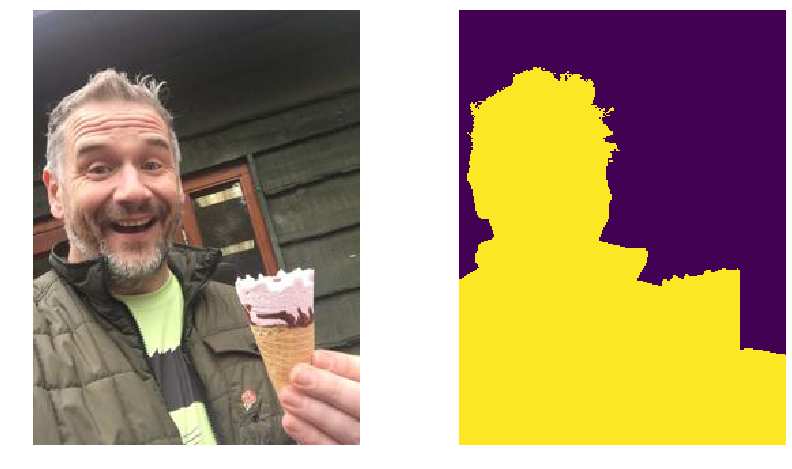

(320, 240)


In [0]:
#from liba import *
print(sys.path)
path = "data/train"
images = os.listdir(path)
ind = np.random.choice(images).split(".")[0]

img = np.array(Image.open(f"{path}/{ind}.jpg"))
mask = np.array(Image.open(f"{path}_mask/{ind}.png"))
show_img_with_mask(img, mask)
print(mask.shape)

Пример подсчета метрики:

In [0]:
random_mask = np.random.randint(low=0, high=2, size=mask.shape)
get_dice(mask, random_mask)

0.5387137452711217

Можно для последовательности масок вычислить среднее значение метрики:

In [0]:
random_masks_1 = [np.random.randint(low=0, high=2, size=mask.shape) for i in range(10)]
random_masks_2 = [np.random.randint(low=0, high=2, size=mask.shape) for i in range(10)]
get_dice(random_masks_1, random_masks_2)

0.49996163223307344

Пример использования функций `encode_rle` и `decode_rle`:
1. Функция `encode_rle` используется для кодирования маски в строку для последующей записи в файл;
2. Функция `decode_rle` используется для восстановления маски по закодированной строке.

In [0]:
rle_mask = encode_rle(mask)
rle_mask

'3517 2 3753 1 3755 7 3990 15 4009 2 4224 3 4229 28 4463 35 4676 1 4701 45 4915 12 4931 2 4938 50 5154 75 5393 79 5631 84 5870 87 6109 90 6348 92 6441 1 6588 95 6827 96 7066 97 7306 96 7545 97 7785 97 8023 99 8263 99 8504 89 8595 1 8598 4 8745 87 8838 4 8984 88 9079 3 9083 4 9226 87 9319 9 9464 1 9466 88 9559 10 9706 89 9799 10 9945 100 10046 4 10184 101 10286 3 10423 101 10525 3 10663 106 10770 1 10903 105 11010 1 11146 102 11250 1 11385 102 11490 2 11624 108 11864 107 12104 101 12208 4 12344 103 12448 2 12583 103 12688 2 12823 108 13063 106 13171 1 13303 108 13543 110 13782 109 14023 106 14263 107 14503 108 14741 111 14981 111 15220 111 15459 113 15699 113 15939 113 16178 113 16420 113 16534 1 16661 113 16900 112 17139 114 17378 114 17616 116 17857 115 18097 116 18337 114 18574 1 18576 117 18814 118 19055 117 19293 120 19534 120 19772 122 20011 122 20252 123 20491 124 20731 125 20973 123 21211 125 21453 124 21692 123 21932 125 22172 125 22413 124 22652 125 22894 124 23134 1 23136 1 2

Теперь восстановим маску:

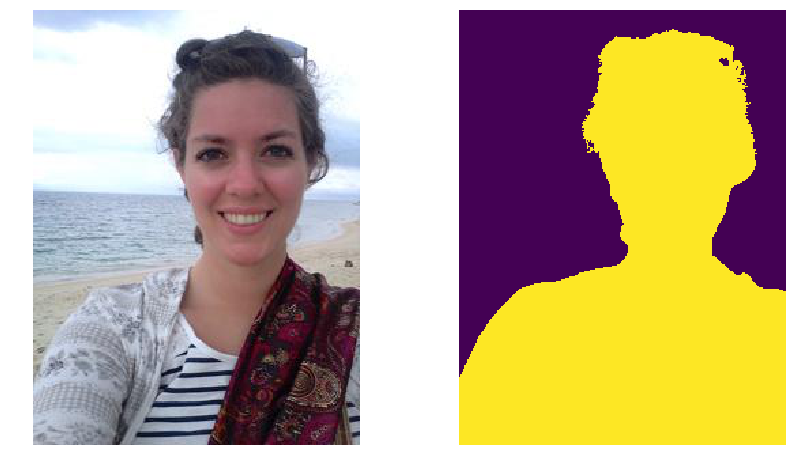

In [0]:
decoded_mask = decode_rle(rle_mask)
show_img_with_mask(img, decoded_mask)

---

# Результаты

Пример файла для изображений из `data/valid`:  
_Каждую предсказанную маску для изображения из `valid` необходимо закодировать и записать в показанный ниже файл, который служит примером, именно в таком виде нужно будет представить результат Вашего лучшего решения на данных из `valid`._

In [0]:
pred = pd.read_csv("data/pred_valid_template.csv")
pred.head()

,id,rle_mask
0,1315,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
1,1316,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
2,1317,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
3,1318,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...
4,1319,9706 7 9939 15 9974 8 10174 20 10214 13 10412 ...


Для данных из `test` требуется создать html страницу + картинки для нее.  
Это можно сделать с помощью функции `get_html`, как показано ниже.

In [0]:
paths_to_imgs = sorted(glob("data/valid/*"))
pred_masks = [np.array(Image.open(path)) for path in sorted(glob("data/valid_mask/*"))]

_ = get_html(paths_to_imgs, pred_masks, path_to_save="results/example")

В папке `results` создался файл `example.html` и папка `examples` с используемыми картинками.

Один из самых широко используемых методов сегментации это U-Net like нейронные сети. Поэтому я решила применить этот подход здесь.

In [0]:
# sub-parts of the U-Net model

import torch
import torch.nn as nn
import torch.nn.functional as F


class double_conv(nn.Module):
    '''(conv => BN => ReLU) * 2'''
    def __init__(self, in_ch, out_ch):
        super(double_conv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.conv(x)
        return x


class inconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(inconv, self).__init__()
        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x):
        x = self.conv(x)
        return x


class down(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(down, self).__init__()
        self.mpconv = nn.Sequential(
            nn.MaxPool2d(2),
            double_conv(in_ch, out_ch)
        )

    def forward(self, x):
        x = self.mpconv(x)
        return x


class up(nn.Module):
    def __init__(self, in_ch, out_ch, bilinear=True):
        super(up, self).__init__()

        #  would be a nice idea if the upsampling could be learned too,
        #  but my machine do not have enough memory to handle all those weights
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        else:
            self.up = nn.ConvTranspose2d(in_ch//2, in_ch//2, 2, stride=2)

        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, (diffX // 2, diffX - diffX//2,
                        diffY // 2, diffY - diffY//2))
        
        # for padding issues, see 
        # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
        # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd

        x = torch.cat([x2, x1], dim=1)
        x = self.conv(x)
        return x


class outconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(outconv, self).__init__()
        self.conv = nn.Conv2d(in_ch, out_ch, 1)

    def forward(self, x):
        x = self.conv(x)
        return x
      
# full assembly of the sub-parts to form the complete net

import torch.nn.functional as F

class UNet(nn.Module):
    def __init__(self, n_channels, n_classes):
        super(UNet, self).__init__()
        self.inc = inconv(n_channels, 64)
        self.down1 = down(64, 128)
        self.down2 = down(128, 256)
        self.down3 = down(256, 512)
        self.down4 = down(512, 512)
        self.up1 = up(1024, 256)
        self.up2 = up(512, 128)
        self.up3 = up(256, 64)
        self.up4 = up(128, 64)
        self.outc = outconv(64, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        x = self.outc(x)
        return F.sigmoid(x)


In [0]:
import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
from torch import optim
from torch.autograd import Function, Variable

class DiceCoeff(Function):
    """Dice coeff for individual examples"""

    def forward(self, input, target):
        self.save_for_backward(input, target)
        eps = 0.0001
        self.inter = torch.dot(input.view(-1), target.view(-1))
        self.union = torch.sum(input) + torch.sum(target) + eps

        t = (2 * self.inter.float() + eps) / self.union.float()
        return t

    # This function has only a single output, so it gets only one gradient
    def backward(self, grad_output):

        input, target = self.saved_variables
        grad_input = grad_target = None

        if self.needs_input_grad[0]:
            grad_input = grad_output * 2 * (target * self.union - self.inter) \
                         / (self.union * self.union)
        if self.needs_input_grad[1]:
            grad_target = None

        return grad_input, grad_target


def dice_coeff(input, target):
    """Dice coeff for batches"""
    if input.is_cuda:
        s = torch.FloatTensor(1).cuda().zero_()
    else:
        s = torch.FloatTensor(1).zero_()

    for i, c in enumerate(zip(input, target)):
        s = s + DiceCoeff().forward(c[0], c[1])

    return s / (i + 1)

def get_square(img, pos):
    """Extract a left or a right square from ndarray shape : (H, W, C))"""
    h = img.shape[0]
    if pos == 0:
        return img[:, :h]
    else:
        return img[:, -h:]

def split_img_into_squares(img):
    return get_square(img, 0), get_square(img, 1)

def hwc_to_chw(img):
    return np.transpose(img, axes=[2, 0, 1])

def resize_and_crop(pilimg, scale=0.5, final_height=None):
    w = pilimg.size[0]
    h = pilimg.size[1]
    newW = int(w * scale)
    newH = int(h * scale)

    if not final_height:
        diff = 0
    else:
        diff = newH - final_height

    img = pilimg.resize((newW, newH))
    img = img.crop((0, diff // 2, newW, newH - diff // 2))
    return np.array(img, dtype=np.float32)

def batch(iterable, batch_size):
    """Yields lists by batch"""
    b = []
    for i, t in enumerate(iterable):
        b.append(t)
        if (i + 1) % batch_size == 0:
            yield b
            b = []

    if len(b) > 0:
        yield b

def split_train_val(dataset, val_percent=0.05):
    dataset = list(dataset)
    length = len(dataset)
    n = int(length * val_percent)
    random.shuffle(dataset)
    return {'train': dataset[:-n], 'val': dataset[-n:]}


def normalize(x):
    return x / 255

def merge_masks(img1, img2, full_w):
    h = img1.shape[0]

    new = np.zeros((h, full_w), np.float32)
    new[:, :full_w // 2 + 1] = img1[:, :full_w // 2 + 1]
    new[:, full_w // 2 + 1:] = img2[:, -(full_w // 2 - 1):]

    return new


def get_ids(dir):
    """Returns a list of the ids in the directory"""
    return (f[:-4] for f in os.listdir(dir))


def split_ids(ids, n=2):
    """Split each id in n, creating n tuples (id, k) for each id"""
    return ((id, i)  for id in ids for i in range(n))


def to_cropped_imgs(ids, dir, suffix, scale):
    """From a list of tuples, returns the correct cropped img"""
    for id, pos in ids:
        im = resize_and_crop(Image.open(dir + id + suffix), scale=scale)
        yield get_square(im, pos)

def to_cropped_masks(ids, dir, suffix, scale):
    """From a list of tuples, returns the correct cropped img"""
    for id, pos in ids:
        im = resize_and_crop(Image.open(dir + id + suffix), scale=scale)
        im = (im > 0).astype(np.float32)
        yield get_square(im, pos)
        
def get_imgs_and_masks(ids, dir_img, dir_mask, scale):
    """Return all the couples (img, mask)"""
    imgs = to_cropped_imgs(ids, dir_img, '.jpg', scale)

    # need to transform from HWC to CHW
    imgs_switched = map(hwc_to_chw, imgs)
    imgs_normalized = map(normalize, imgs_switched)

    masks = to_cropped_masks(ids, dir_mask, '.png', scale)

    return zip(imgs_normalized, masks)


def get_full_img_and_mask(id, dir_img, dir_mask):
    im = Image.open(dir_img + id + '.jpg')
    mask = Image.open(dir_mask + id + '.png')
    return np.array(im), (np.array(mask) > 0).astype(np.int)

def eval_net(net, dataset, gpu=False):
    """Evaluation without the densecrf with the dice coefficient"""
    net.eval()
    tot = 0
    count = 0
    for i, b in enumerate(dataset):
        img = b[0]
        true_mask = b[1]

        img = torch.from_numpy(img).unsqueeze(0)
        true_mask = torch.from_numpy(true_mask).unsqueeze(0)

        if gpu:
            img = img.cuda()
            true_mask = true_mask.cuda()

        mask_pred = net(img)[0]
        mask_pred = (mask_pred > 0.5).float()

        tot += dice_coeff(mask_pred, true_mask).item()
        count += 1
    return tot / (count + 1)
  
def train_net(net,
              epochs=5,
              batch_size=8,
              lr=0.1,
              save_cp=True,
              gpu=False,
              img_scale=0.5):

    dir_img = 'data/train/'
    dir_mask = 'data/train_mask/'
    val_img = 'data/valid/'
    val_mask = 'data/valid_mask/'
    dir_checkpoint = 'checkpoints/'

    ids = get_ids(dir_img)
    ids_val = get_ids(val_img)
    ids = list(split_ids(ids))

    ids_val = list(split_ids(ids_val))
    
    iddataset = {'train': ids, 'val': ids_val}
    N_train = len(iddataset['train'])
    print(N_train)
    print('''
    Starting training:
        Epochs: {}
        Batch size: {}
        Learning rate: {}
        Training size: {}
        Validation size: {}
        Checkpoints: {}
        CUDA: {}
    '''.format(epochs, batch_size, lr, len(list(iddataset['train'])),
               len(list(iddataset['val'])), str(save_cp), str(gpu)))


    optimizer = optim.SGD(net.parameters(),
                          lr=lr,
                          momentum=0.9,
                          weight_decay=0.0005)

    criterion = nn.BCELoss()

    for epoch in range(epochs):
        print('Starting epoch {}/{}.'.format(epoch + 1, epochs))
        net.train()
        # reset the generators
        train = get_imgs_and_masks(iddataset['train'], dir_img, dir_mask, img_scale)
        val = get_imgs_and_masks(iddataset['val'], val_img, val_mask, img_scale)

        epoch_loss = 0
        #print(list(batch(train, batch_size)))
        for i, b in enumerate(batch(train, batch_size)):
            imgs = np.array([i[0] for i in b]).astype(np.float32)
            true_masks = np.array([i[1] for i in b])

            imgs = torch.from_numpy(imgs)
            true_masks = torch.from_numpy(true_masks)

            if gpu:
                imgs = imgs.cuda()
                true_masks = true_masks.cuda()

            masks_pred = net(imgs)
            masks_probs_flat = masks_pred.view(-1)
            #print('pred',masks_probs_flat)
            
            true_masks_flat = true_masks.view(-1)
            #print('true',true_masks_flat)

            loss = criterion(masks_probs_flat, true_masks_flat)
            epoch_loss += loss.item()

            #print('{0:.4f} --- loss: {1:.6f}'.format(i * batch_size / N_train, loss.item()))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print('Epoch finished ! Loss: {}'.format(epoch_loss / batch_size))

        if 1:
            val_dice = eval_net(net, val, gpu)
            print('Validation Dice Coeff: {}'.format(val_dice))




In [0]:
net = UNet(n_channels=3, n_classes=1)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

train_net(net, gpu=True)

2630

    Starting training:
        Epochs: 5
        Batch size: 8
        Learning rate: 0.1
        Training size: 2630
        Validation size: 290
        Checkpoints: True
        CUDA: True
    
Starting epoch 1/5.


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch finished ! Loss: 18.352269869297743
Validation Dice Coeff: 0.8424793164344997
Starting epoch 2/5.
Epoch finished ! Loss: 14.832726657390594
Validation Dice Coeff: 0.8707553576357996
Starting epoch 3/5.
Epoch finished ! Loss: 13.405049577355385
Validation Dice Coeff: 0.8611231633682841
Starting epoch 4/5.
Epoch finished ! Loss: 12.236765252426267
Validation Dice Coeff: 0.9003695308957312
Starting epoch 5/5.
Epoch finished ! Loss: 10.816077060066164
Validation Dice Coeff: 0.8940978887974191
